In [55]:
import sys
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import seaborn as sns
import pandas as pd

In [10]:
# Import NanoscoPy custom modules
sys.path.append('../../nanoscopy')
from nanoscopy import spectrum
from nanoscopy.utilities import dialog_askdirectory 
from nanoscopy.plot import PlotGen

In [4]:
file_path = dialog_askdirectory()
file_path

'J:/2021-12-17 IV Curves on Graduated Device'

In [5]:
spectra = spectrum.read(file_path)

In [6]:
len(spectra)

9

In [7]:
spectra[0].data.head()

,SMU Voltage (V),SMU Current (A),Preamp Current (A)
0,-0.040091,-1.998622e-11,2.402942e-13
1,-0.030094,-1.942513e-11,2.800383e-13
2,-0.020092,-1.983309e-11,2.511108e-13
3,-0.010083,-1.860917e-11,3.006202e-13
4,-0.000089,-1.677292e-11,2.745215e-13


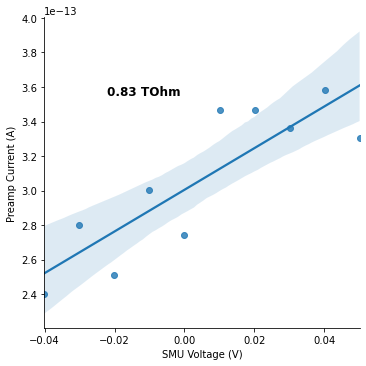

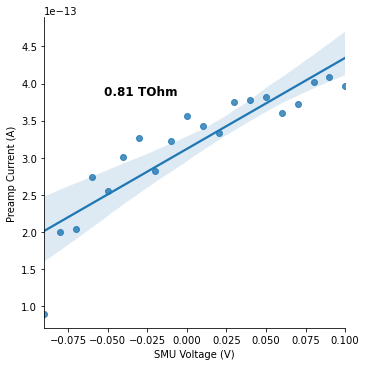

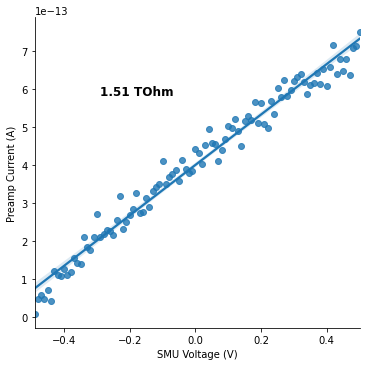

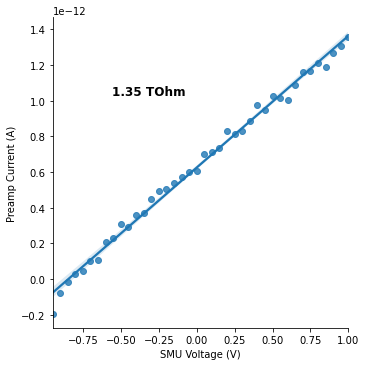

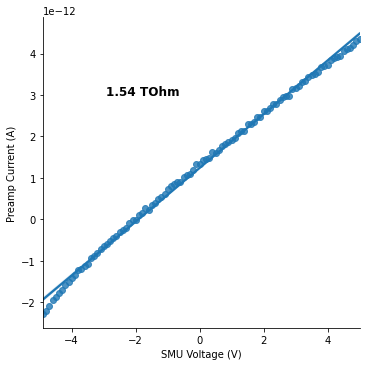

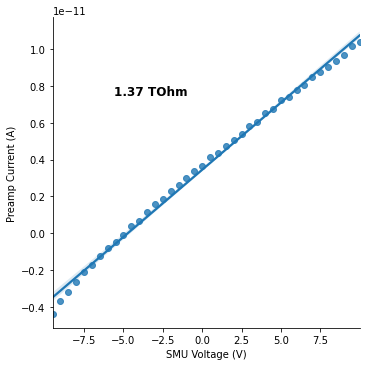

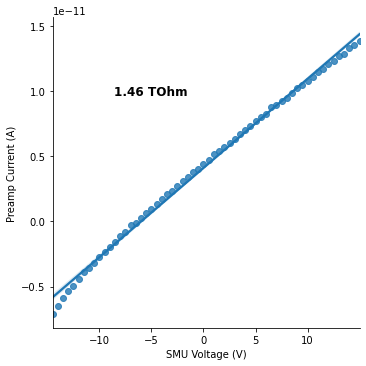

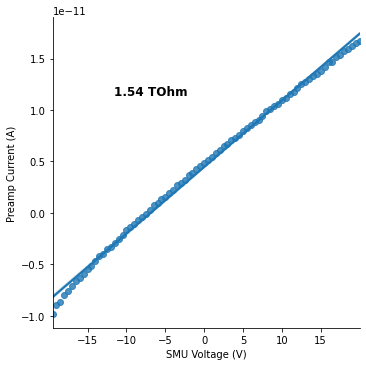

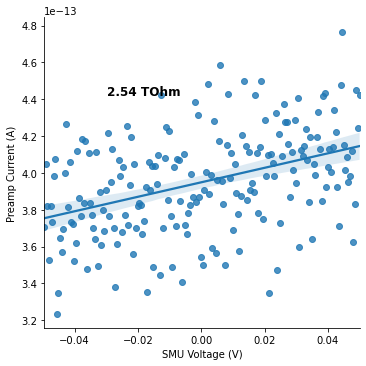

In [63]:
for i, spec in enumerate(spectra):
    x=spec.data['SMU Voltage (V)']
    y=spec.data['Preamp Current (A)']
    coef = np.polyfit(x, y, 1)
    poly1d_fn = np.poly1d(coef)
    slope = coef[0]
    resistance = 1/slope
    resistance_TOhm = resistance * pow(10,-12)

    sns.lmplot(x='SMU Voltage (V)', y='Preamp Current (A)', data=spec.data, fit_reg=True)#.savefig(f"{resistance_TOhm}-TOhm_{i}.png") 
    
    ax = plt.gca()
    ax.text(.2, .75, f'{resistance_TOhm:.2f} TOhm', transform=ax.transAxes, family='sans-serif', size='large', weight='bold')

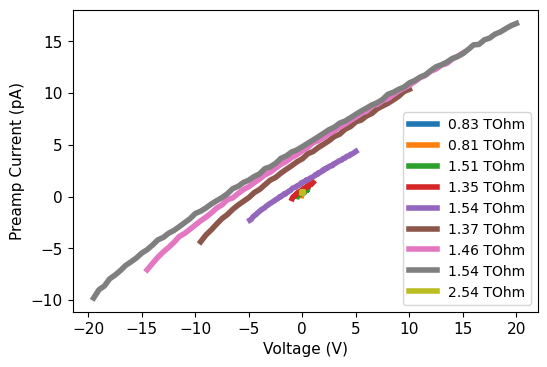

In [82]:
for spec in spectra:
    x=spec.data['SMU Voltage (V)']
    y=spec.data['Preamp Current (A)']
    d={'SMU Voltage (V)': x,'Preamp Current (A)': y}

    coef = np.polyfit(x, y, 1)
    poly1d_fn = np.poly1d(coef)
    slope = coef[0]
    resistance = 1/slope
    resistance_TOhm = resistance * pow(10,-12)

    ys = y * 10**(12)
    plt.plot(x, ys, label = f'{resistance_TOhm:0.2f} TOhm', linewidth=4.0)

plt.xlabel("Voltage (V)", fontsize=11)
plt.ylabel("Preamp Current (pA)", fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend()
plt.gcf().set_dpi(100)
plt.show()

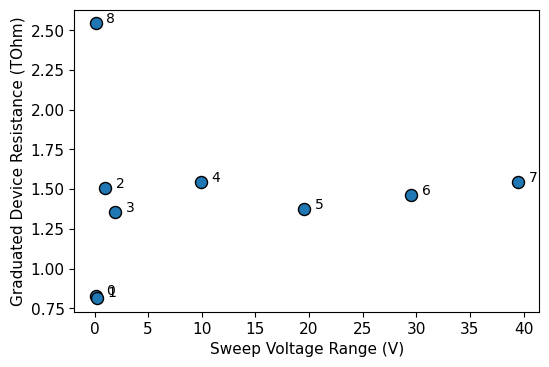

In [123]:
resistances = []
delta_Vs = []
for spec in spectra:
    x=spec.data['SMU Voltage (V)']
    y=spec.data['Preamp Current (A)']
    coef = np.polyfit(x, y, 1)
    poly1d_fn = np.poly1d(coef)
    slope = coef[0]
    resistance = 1/slope
    resistances.append(resistance)
    delta_V = x.max() - x.min()
    delta_Vs.append(delta_V)

resistances = np.array(resistances)* 10**(-12)
delta_Vs = np.array(delta_Vs)

plt.scatter(delta_Vs, resistances, s=75, edgecolors='black')

# Loop for annotation of all points
for i in range(len(delta_Vs)):
    plt.annotate(i, (delta_Vs[i] + 1, resistances[i] + 0.005), fontsize=10)

plt.xlabel("Sweep Voltage Range (V)", fontsize=11)
plt.ylabel("Graduated Device Resistance (TOhm)", fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
# plt.legend()
plt.gcf().set_dpi(100)
plt.show()

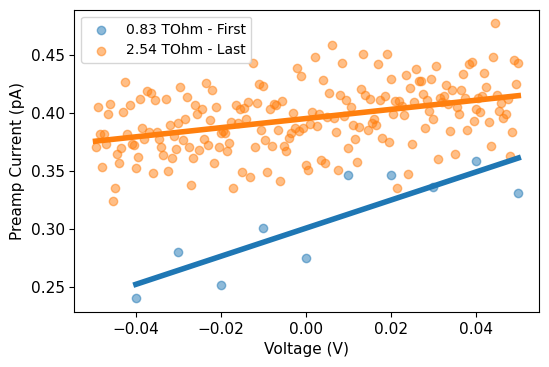

In [122]:
for i, spec in enumerate([spectra[0], spectra[-1]]):
    x=spec.data['SMU Voltage (V)']
    y=spec.data['Preamp Current (A)']
    d={'SMU Voltage (V)': x,'Preamp Current (A)': y}

    coef = np.polyfit(x, y, 1)
    poly1d_fn = np.poly1d(coef)
    slope = coef[0]
    resistance = 1/slope
    resistance_TOhm = resistance * pow(10,-12)

    ys = y * 10**(12)
    
    if i == 0: 
        plt.scatter(x, ys, label = f'{resistance_TOhm:0.2f} TOhm - First', alpha=0.5)
    else:
        plt.scatter(x, ys, label = f'{resistance_TOhm:0.2f} TOhm - Last', alpha=0.5)

    plt.plot(x, poly1d_fn(x) * 10**(12), linewidth=4)

plt.xlabel("Voltage (V)", fontsize=11)
plt.ylabel("Preamp Current (pA)", fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend()
plt.gcf().set_dpi(100)
plt.show()